<a href="https://colab.research.google.com/github/garviit25/Colaboratory/blob/master/Stock%20price%20predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [9]:
df = web.DataReader('RELIANCE.NS', data_source='yahoo', start='2012-01-01', end='2020-05-08')
df 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,354.875000,343.575012,348.399994,353.274994,8598434.0,308.614227
2012-01-03,363.450012,355.174988,356.125000,362.325012,9366982.0,316.520142
2012-01-04,365.475006,356.674988,363.700012,358.075012,8476734.0,312.807434
2012-01-05,362.475006,347.049988,357.500000,349.750000,13239172.0,305.534882
2012-01-06,362.000000,348.325012,348.524994,358.774994,9406294.0,313.418945
...,...,...,...,...,...,...
2020-04-30,1494.949951,1438.050049,1453.949951,1466.000000,32616945.0,1466.000000
2020-05-04,1465.000000,1417.449951,1440.000000,1435.199951,24438682.0,1435.199951
2020-05-05,1479.000000,1447.199951,1453.699951,1460.650024,20528490.0,1460.650024


In [10]:
df.shape


(2050, 6)

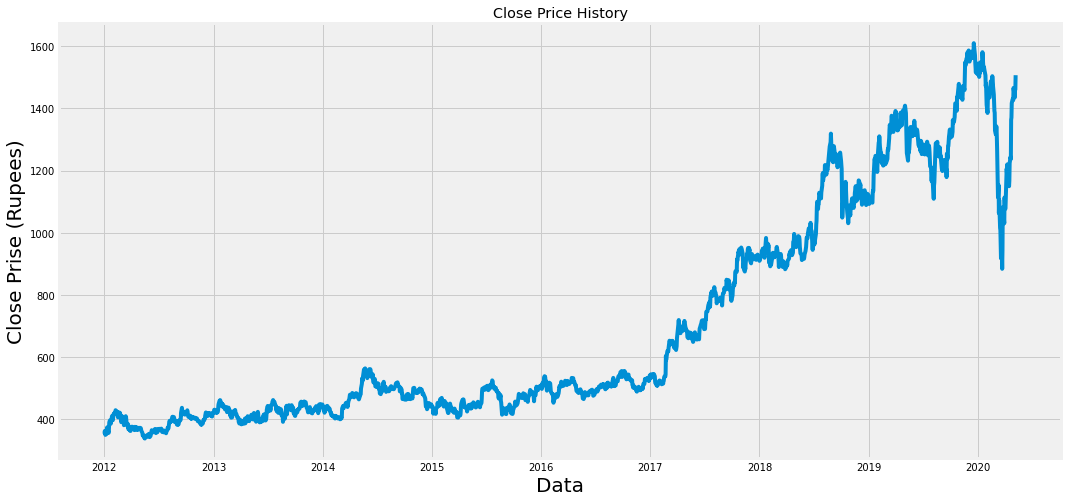

In [11]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=20)
plt.ylabel('Close Prise (Rupees)', fontsize=20)
plt.show()

In [13]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)* .8)
training_data_len


1640

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.01197029],
       [0.01908564],
       [0.01574418],
       ...,
       [0.88261661],
       [0.88269522],
       [0.91901879]])

In [19]:
#Create Training dataset
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)


[array([0.01197029, 0.01908564, 0.01574418, 0.00919885, 0.01629453,
       0.01185236, 0.02362609, 0.02836309, 0.02390127, 0.02189638,
       0.01448622, 0.02592579, 0.04074614, 0.04306551, 0.0458173 ,
       0.03752261, 0.04231859, 0.04514901, 0.05672618, 0.04664283,
       0.05542889, 0.06097179, 0.06020522, 0.06376288, 0.06167939,
       0.06621984, 0.07166446, 0.06987578, 0.06570879, 0.06806747,
       0.06792989, 0.06311426, 0.05360093, 0.05586133, 0.06582672,
       0.06183664, 0.06427392, 0.05654927, 0.04141443, 0.04733078,
       0.05686376, 0.05301126, 0.05424955, 0.04772389, 0.03948817,
       0.03368976, 0.03840711, 0.04813665, 0.05654927, 0.0544068 ,
       0.04738975, 0.0378371 , 0.0310559 , 0.03319837, 0.03614672,
       0.02368504, 0.02671201, 0.02122808, 0.02160155, 0.0194984 ])]
[0.0190856396831508]
[array([0.01197029, 0.01908564, 0.01574418, 0.00919885, 0.01629453,
       0.01185236, 0.02362609, 0.02836309, 0.02390127, 0.02189638,
       0.01448622, 0.02592579, 0.0407

In [0]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [23]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1580, 60, 1)

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [0]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1580/1580 [==============================] - 59s 37ms/step - loss: 9.7983e-04


In [0]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [35]:
#convert the data to a numpy array

x_test = np.array(x_test)
x_test

array([[0.46583852, 0.47393663, 0.47928301, ..., 0.73229027, 0.73861942,
        0.74962657],
       [0.47393663, 0.47928301, 0.48459003, ..., 0.73861942, 0.74962657,
        0.77124777],
       [0.47928301, 0.48459003, 0.49791651, ..., 0.74962657, 0.77124777,
        0.75174934],
       ...,
       [0.84409157, 0.82353176, 0.85568839, ..., 0.85612076, 0.8868229 ,
        0.86260712],
       [0.82353176, 0.85568839, 0.87306395, ..., 0.8868229 , 0.86260712,
        0.88261661],
       [0.85568839, 0.87306395, 0.88037589, ..., 0.86260712, 0.88261661,
        0.88269522]])

In [0]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [38]:
#get the models predicted price of values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[1258.6989 ],
       [1271.8854 ],
       [1282.1393 ],
       [1288.0797 ],
       [1288.0896 ],
       [1284.0675 ],
       [1279.7836 ],
       [1274.2338 ],
       [1272.1742 ],
       [1273.6251 ],
       [1274.3462 ],
       [1272.9601 ],
       [1272.2404 ],
       [1271.8987 ],
       [1269.0457 ],
       [1264.4928 ],
       [1258.9299 ],
       [1254.1174 ],
       [1251.5812 ],
       [1250.2183 ],
       [1251.6875 ],
       [1254.5509 ],
       [1258.2407 ],
       [1259.3064 ],
       [1256.4114 ],
       [1243.608  ],
       [1220.135  ],
       [1199.9958 ],
       [1181.2095 ],
       [1166.287  ],
       [1153.2866 ],
       [1146.5006 ],
       [1144.6523 ],
       [1147.8345 ],
       [1151.8431 ],
       [1150.8567 ],
       [1143.7407 ],
       [1133.5487 ],
       [1121.8885 ],
       [1109.1411 ],
       [1098.5637 ],
       [1094.3694 ],
       [1090.5312 ],
       [1087.8119 ],
       [1085.3721 ],
       [1085.1888 ],
       [1087.6152 ],
       [1092.

In [39]:
#Get the rms error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

14.221942585270579

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


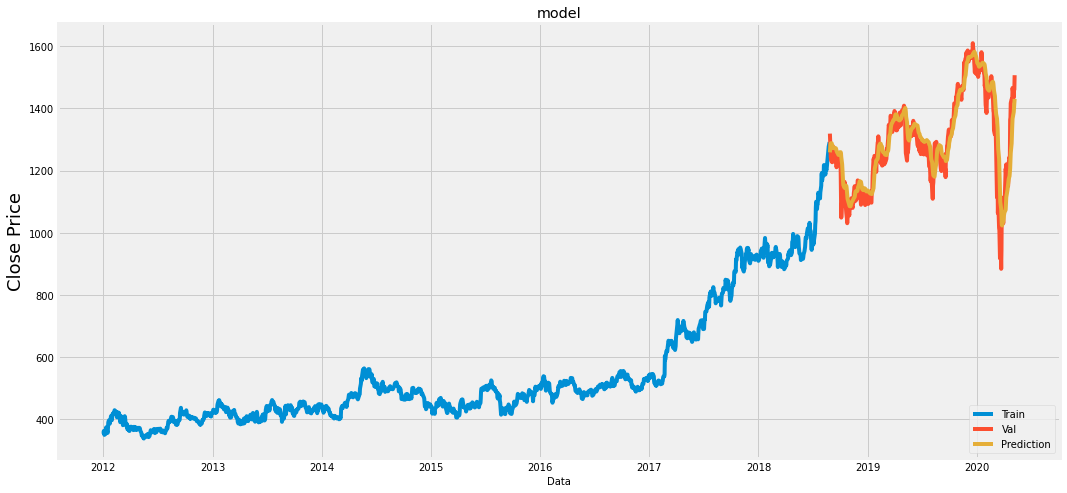

In [43]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualise the data
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Data',fontsize=10)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()


In [44]:
#Show the valid and predicted price
valid

,Close,Predictions
Date,,
2018-08-28,1319.000000,1258.698853
2018-08-29,1294.199951,1271.885376
2018-08-30,1274.449951,1282.139282
2018-08-31,1241.650024,1288.079712
2018-09-03,1229.150024,1288.089600
...,...,...
2020-04-30,1466.000000,1366.673706
2020-05-04,1435.199951,1388.414307
2020-05-05,1460.650024,1404.381958


In [47]:
#Get the quote
reliance_quote = web.DataReader('RELIANCE.NS', data_source='yahoo', start='2012-01-01', end='2020-05-08')
new_df = reliance_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test= np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1444.7794]]
